#  Data science automation

This week is all about looking at automation tehcniques for data science and with Python. We can automate a lot of things with Python: collecting data, processing it, cleaning it, and many other parts of the data science pipeline. Here, we will show how to:

- use the pycaret autoML Python package to find an optimized ML model for our diabetes dataset
- create a Python script to ingest new data and make predictions on it

Often, next steps in fully operationalizing an ML pipeline like this are to use a cloud service to scale and serve our ML algorithm. We can use things like AWS lambda, GCP, AWS, or Azure ML depolyment with tools such as docker and kubernetes.

# Data Preparation

It includes pulling the dataset from the system and we are going to load our same prepared data from week 2 where everything has been converted to numbers.

In [42]:
import pandas as pd

df = pd.read_csv(r"C:\Users\anupu\Downloads\week2_churn_prepared.csv" ,index_col='customerID')
df = df.drop(['TotalCharges_MonthlyCharges_ratio','TotalCharges_tenure_ratio','Unnamed: 0'],axis=1)
df

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,charge_per_tenure
customerID,,,,,,,,
7590-VHVEG,1,0,0,0,29.85,29.85,0,1.000000
5575-GNVDE,34,1,2,1,56.95,1889.50,0,33.178227
3668-QPYBK,2,1,0,1,53.85,108.15,1,2.008357
7795-CFOCW,45,0,2,2,42.30,1840.75,0,43.516548
9237-HQITU,2,1,0,0,70.70,151.65,1,2.144979
...,...,...,...,...,...,...,...,...
6840-RESVB,24,1,2,1,84.80,1990.50,0,23.472877
2234-XADUH,72,1,2,3,103.20,7362.90,0,71.345930
4801-JZAZL,11,0,0,0,29.60,346.45,0,11.704392


In [43]:
from pycaret.classification import *


In [44]:
automl = setup(df, target='Churn')

,Description,Value
0,Session id,3541
1,Target,Churn
2,Target type,Binary
3,Original data shape,"(7043, 8)"
4,Transformed data shape,"(7043, 8)"
5,Transformed train set shape,"(4930, 8)"
6,Transformed test set shape,"(2113, 8)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,simple


INTERPRETATION:

Here, the preprocess is true it includes outliers treatment ,missing value treatment and feature engineering

In [45]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7978,0.8378,0.5069,0.6538,0.5705,0.4411,0.4475,0.3590
ada,Ada Boost Classifier,0.7917,0.8369,0.5084,0.6347,0.5638,0.4293,0.4343,0.1450
lr,Logistic Regression,0.7903,0.8256,0.4900,0.6383,0.5527,0.4191,0.4264,0.8390
ridge,Ridge Classifier,0.7876,0.0000,0.4365,0.6508,0.5211,0.3916,0.4053,0.0210
lda,Linear Discriminant Analysis,0.7862,0.8188,0.4962,0.6249,0.5517,0.4140,0.4196,0.0260
lightgbm,Light Gradient Boosting Machine,0.7834,0.8288,0.5000,0.6124,0.5501,0.4095,0.4134,0.2460
rf,Random Forest Classifier,0.7740,0.8038,0.4832,0.5908,0.5314,0.3845,0.3880,0.2760
knn,K Neighbors Classifier,0.7643,0.7429,0.4258,0.5760,0.4887,0.3403,0.3473,0.0520
et,Extra Trees Classifier,0.7527,0.7786,0.4633,0.5399,0.4982,0.3356,0.3375,0.2040
dummy,Dummy Classifier,0.7347,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0200


INTERPRETATION:

1. Here, every model is being tested to get best accuracy by automl.
2. Gradient Boosting Classifier is the best model for given dataset.

In [46]:
best_model

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=3541, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

INTERPRETATION:

1. These are the best parameters for the model after hyperparameter tuning.

In [47]:
df.iloc[-2:-1]

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,charge_per_tenure
customerID,,,,,,,,
8361-LTMKD,4,1,0,1,74.4,306.6,1,4.120968


We are selecting the last row, but using the indexing `[-2:-1]` to make it a 2D array instead of 1D (which throws an error). Try running `df.iloc[-1].shape` and `df.iloc[-2:-1].shape` to see how they differ.

However, this only works if we set `preprocess=False` in our setup function. Otherwise the order of features may be different

A more robust way (in case we are using preprocessing with autoML) is to use pycaret's predict_model function:

In [96]:
predict_model(best_model, df.iloc[-2:-1])

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,charge_per_tenure,prediction_label,prediction_score
customerID,,,,,,,,,
7832-POPKP,62,1,0,2,101.699997,3106.560059,50.105808,0,0.6631


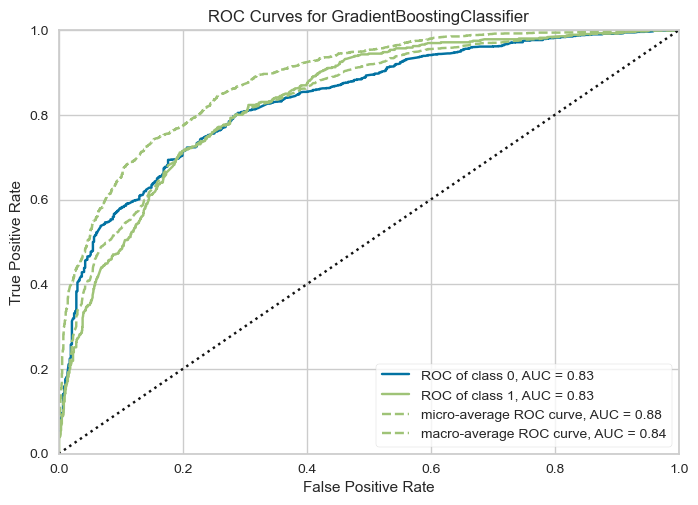

In [98]:
plot_model(model, plot='auc')

INTERPRETATIONS:
1. In this plot, The roc of class 0 and roc of class 1 both are positivily increasing against false positive rate and towards true positive rate which proves the efficiency of prediction.
2. the AUC values of class 0 and 1 are above 0.8 which indicates better discrimination performance of the model.

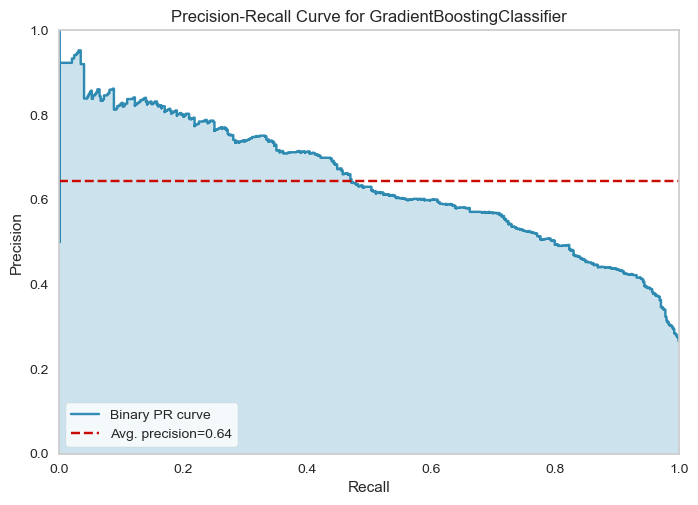

In [99]:
plot_model(model, plot='pr')

INTERPRETATION:
1. The Precision-Recall (PR) curve is another evaluation metric used in binary classification tasks, particularly when dealing with imbalanced datasets.
2. The PR curve is a graphical representation of the trade-off between precision and recall for different threshold values used to classify instances as positive or negative.
3. the curve has  downward trend i.e; with increase in Recall the Precision is decreasing rapidly.

# SAVING AND LOADING MODEL

Next, we want to save our trained model so we can use it in a Python file

In [55]:
save_model(best_model, 'gbc')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['tenure', 'PhoneService',
                                              'Contract', 'PaymentMethod',
                                              'MonthlyCharges', 'TotalCharges',
                                              'charge_per_tenure'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('c...
                                             criterion='f

In [64]:
import pickle
with open('gbc.pkl','wb') as f:
    pickle.dump(best_model, f)

In [65]:
with open('gbc.pkl','rb') as f:
    loaded_model = pickle.load(f)

In [67]:
new_data=df.iloc[-2:-1]

In [68]:
predict_model(loaded_gbc, new_data)

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,charge_per_tenure,prediction_label,prediction_score
customerID,,,,,,,,,
7832-POPKP,62,1,0,2,101.699997,3106.560059,50.105808,0,0.6631


INTERPRETATION:
1. The prediction score is around 66% .

# Making a Python module to make predictions

In [102]:
from IPython.display import Code

Code(r"C:\Users\anupu\Downloads\predict_churn_data.py")

import pandas as pd
from pycaret.classification import predict_model, load_model


def load_data(filepath):
    """
    Loads churn data into a DataFrame from a string filepath.
    """
    df = pd.read_csv(filepath, index_col='customerID')
    return df


def make_predictions(df, threshold=0.7):
    model = load_model('gbc')
    predictions = predict_model(model, data= df)
    
    predictions.rename({'prediction_label':'predicted_churn'}, axis=1, inplace = True)
    predictions['predicted_churn']=(predictions['prediction_score']>=threshold)
    predictions['predicted_churn'].replace({False:1,True:0}, inplace = True)
    return predictions['predicted_churn']



if __name__== "__main__":
    df = load_data(r"C:\Users\anupu\Downloads\new_churn_data.csv")
    predictions = make_predictions(df)
    print('predictions:')
    print(predictions)

In [103]:
%run C:\Users\anupu\Downloads\predict_churn_data.py

Transformation Pipeline and Model Successfully Loaded


predictions:
customerID
9305-CKSKC    1
1452-KNGVK    0
6723-OKKJM    0
7832-POPKP    1
6348-TACGU    0
Name: predicted_churn, dtype: int64


# SUMMARY

1. First, the data used to train and test the ML model is a telecommunication churn dataset with only numeric features.
2. The next is I have imported the Pycaret package which contains the 'automl' function which by default does the preprocessing, splitting into training-testing data,then loaded every model with train-test data, also it performs hyperparameter tuning and gives us the best ML model with the best accuracy and required best parameters.
3. using the information from the 'automl' function we can load, predict data and save the model using respective functions defined in 'pycaret' package.
4. To test the predictions efficiency I have created Python module and interlinked it with the current directory or notebook using 'code()' and 'run' function from 'IPython.display' package and for the data I have used new churn dataset with known values for prediction.
5. after predicting and checking efficiency I have saved and uploaded all the files used and created into the GITHUB.